# Captum AI allows us to calculate shapely values on GPU with torch module.

In [ ]:
# https://pytorch.org/tutorials/beginner/introyt/captumyt.html
# https://captum.ai/api/deep_lift_shap.html

In [28]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients
import numpy as np
from captum.attr import visualization as v
from matplotlib.colors import LinearSegmentedColormap
from captum.attr import DeepLift

[[ 0.00073229  0.00595292 -0.00326608  0.10179003 -0.00712918]
 [-0.00327036  0.00556588  0.04723166 -0.01358457 -0.07256275]
 [ 0.00173604 -0.13921227  0.00670905 -0.24232765 -0.04444863]
 [ 0.2405679  -0.02339805 -0.00032365 -0.00474422 -0.18758817]
 [ 0.00073134  0.03192117  0.08210248 -0.11426929 -0.06505863]
 [ 0.00844837 -0.05163658  0.04809923 -0.18805236 -0.08718133]
 [-0.02540525 -0.04150772 -0.0010127  -0.00105646 -0.03629303]
 [-0.10131034  0.03557567 -0.00776956  0.07884534 -0.15811959]
 [ 0.03291784  0.02715557  0.00028847  0.10737846 -0.12542848]
 [-0.13999484  0.00290058 -0.02997722  0.03774757 -0.01700944]]
tensor([-0.0243,  0.0043, -0.0927, -0.0588,  0.0242,  0.0224, -0.0477, -0.0845,
        -0.1046, -0.0401], device='cuda:0')


c:\Users\adi_s\anaconda3\envs\conda311new\Lib\site-packages\captum\_utils\gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
c:\Users\adi_s\anaconda3\envs\conda311new\Lib\site-packages\captum\attr\_core\deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


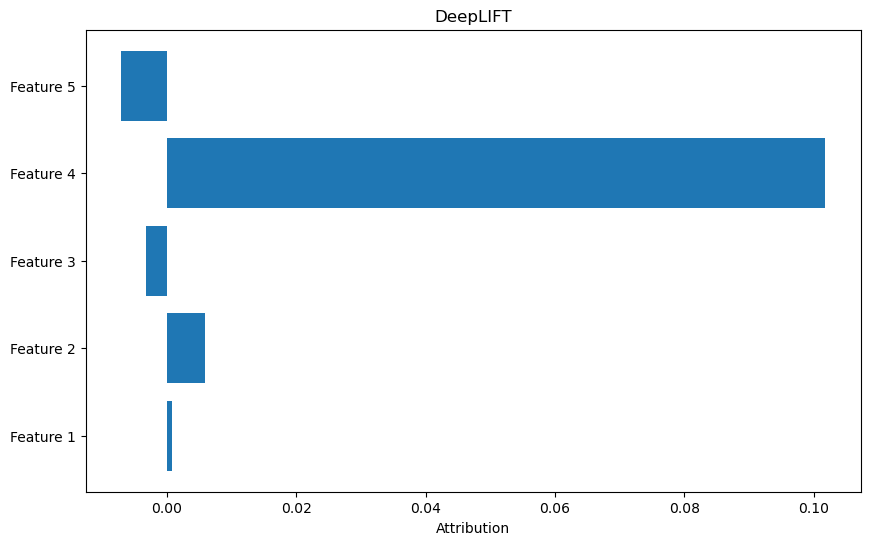

In [ ]:
class GPUGradient(nn.Module):
    def __init__(self):
        super(GPUGradient, self).__init__()
        self.fc1 = nn.Linear(5, 128)
        self.fc2 = nn.Linear(128, 2)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GPUGradient().to(device)

input_data = torch.randn(10, 5).to(device)
dlift = DeepLift(model)
attributions, delta = dlift.attribute(input_data, target=1, return_convergence_delta=True)
attributions = attributions.cpu().detach().numpy()
print(attributions)
print(delta)

features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5']
plt.figure(figsize=(8, 6))
plt.barh(features, attributions[0])
plt.xlabel('Attribution')
plt.title('DeepLIFT')
plt.show()


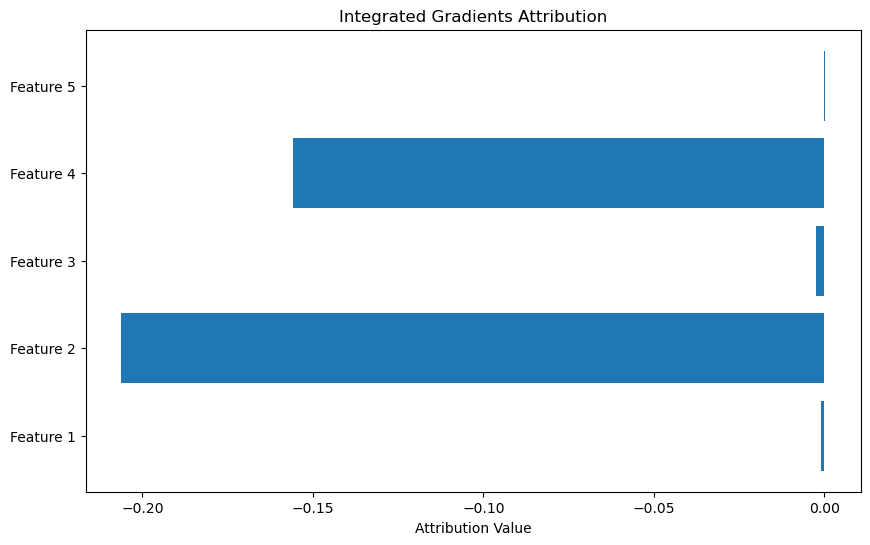

In [ ]:
integrated_gradients = IntegratedGradients(model)
attributions_ig = integrated_gradients.attribute(input_data, target=1, n_steps=200)
attributions_ig = attributions_ig.cpu().detach().numpy()
features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5']
plt.figure(figsize=(8, 6))
plt.barh(features, attributions_ig[0])
plt.xlabel('Attribution')
plt.title('Integrated Gradients')
plt.show()